In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def best_objective(l, f=min):
    r = [l[0]]
    for li in l[1:]:
        r.append(f(r[-1], li))
    return r

In [3]:
df = {}
case = "model-4-true-true"
case = "model-4-false-false"

# # deephyper-RF
# df["deephyper-RF"] = []
# for i in range(1,6):
#     df["deephyper-RF"].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
#     df["deephyper-RF"][i-1]["objective"] = np.exp(-df["deephyper-RF"][i-1]["objective"])

# # deephyper-GP
# df["deephyper-GP"] = []
# for i in range(1,6):
#     df["deephyper-GP"].append(pd.read_csv(f"exp/deephyper_gp/{case}-{i}/results.csv"))
#     df["deephyper-GP"][i-1]["objective"] = np.exp(-df["deephyper-GP"][i-1]["objective"])
    
# # deephyper-DUMMY
# df["deephyper-DUMMY"] = []
# for i in range(1,6):
#     df["deephyper-DUMMY"].append(pd.read_csv(f"exp/deephyper_dummy/{case}-{i}/results.csv"))
#     df["deephyper-DUMMY"][i-1]["objective"] = np.exp(-df["deephyper-DUMMY"][i-1]["objective"])

    
# # optuna-TPE
# df["optuna-TPE"] = []
# for i in range(1,6):
#     df["optuna-TPE"].append(pd.read_csv(f"exp/optuna_tpe/{case}-{i}/results.csv"))
#     df["optuna-TPE"][i-1]["objective"] = np.exp(df["optuna-TPE"][i-1]["objective"])
    
# optuna-CMAES
# df["optuna-CMAES"] = []
# for i in range(1,6):
#     df["optuna-CMAES"].append(pd.read_csv(f"exp/optuna_cmaes/{case}-{i}/results.csv"))
#     df["optuna-CMAES"][i-1]["objective"] = np.exp(df["optuna-CMAES"][i-1]["objective"])

# GPTune
df["gptune"] = []
for i in range(1,6):
    df["gptune"].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
    df["gptune"][i-1]["objective"] = np.exp(df["gptune"][i-1]["objective"])

colors = {
    "deephyper-RF": "orange",
    "deephyper-GP": "cyan",
    "deephyper-DUMMY": "lime",
    "optuna-TPE": "red",
    "optuna-CMAES": "yellow",
    "gptune": "purple",
}

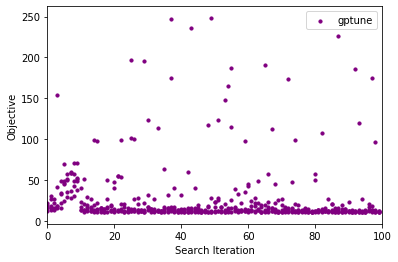

In [4]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i.iloc[:100]
        x = list(range(len(subdf["objective"])))
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlim(0, 100)
plt.xlabel("Search Iteration")
plt.ylabel("Objective")
plt.show()

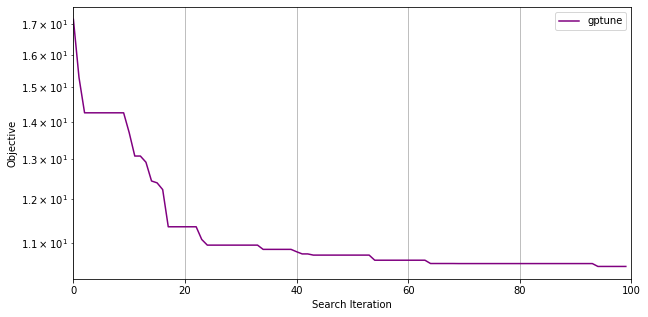

In [5]:
plt.figure(figsize=(10, 5))

x = np.arange(100)
for k, df_list in df.items():
    Y = []
    for i, df_i in enumerate(df_list):
        subdf = df_i.iloc[:100]
        Y.append(best_objective(subdf["objective"]))
    Y = np.asarray(Y)
    y_mean = Y.mean(axis=0)
    y_std = Y.std(axis=0)
    plt.plot(x, y_mean, color=colors[k], label=k)
#     plt.fill_between(x, y_mean - 1.96*y_std, y_mean + 1.96*y_std, color=colors[k], alpha=0.2)

plt.legend()
plt.xlim(0, 100)
plt.xlabel("Search Iteration")
plt.ylabel("Objective")
plt.yscale("log")
plt.grid()
plt.show()